In [214]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats

In [3]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
data = pd.read_csv(url)


In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


##### our target variable is Happiness score and have continuous data.

In [5]:
# Checking size of our data.
data.shape

(158, 12)

##### Our data set have 158 rows and 12 columns

In [6]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

##### We cannot see any null values in our data.

In [7]:
# let's check data information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### As we can see in our data, Country and region have catigorical data. and happiness have intiger values, rest all the columns have Float data.

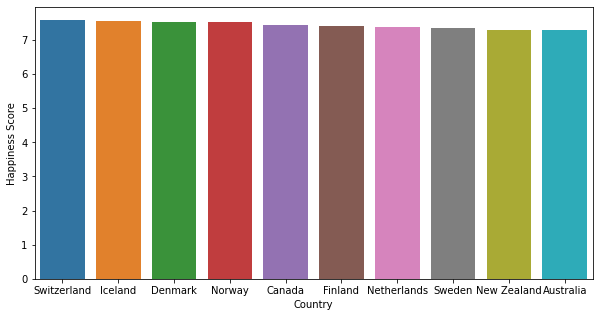

In [8]:
# Let's check top 10 happiness countries.
plt.figure(figsize=(10,5))
sns.barplot(x=data['Country'].head(10), y= data['Happiness Score'], data=data,)
plt.show()

In [9]:
### Switzerland has highest happiness score.

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

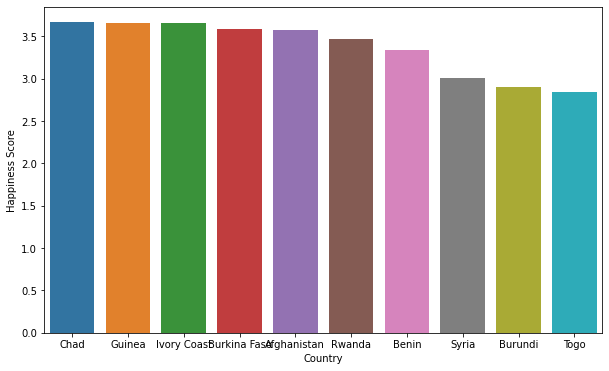

In [128]:
# Let's check least 10 countries.
plt.figure(figsize=(10,6))
sns.barplot(x=data['Country'].tail(10),y=data['Happiness Score'],data=data)

### Togo has least happiness score.

In [130]:
##### Check our data statistically
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


##### So we can see that there is no Null values in our data.
##### Also the difference between Mean and Std is looks fine.
##### Few columns shows minimum value is zero, like Economy, Family, Health, Freedom, Generosity, and Trust. Need to check with data distribution 
##### Gap between Quartiles is looking fine.

In [131]:
# Let's check skewness score
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

###### We have right skewnness in Trust (Government Corruption), Generosity, Standard Error. And left skewness in Family, Health (Life Expectancy).

# Let's Visualize the data distribution.

In [146]:
df = data.drop(['Region','Country','Happiness Rank'],axis=1) # as data distribution could be only shown for continuous data.

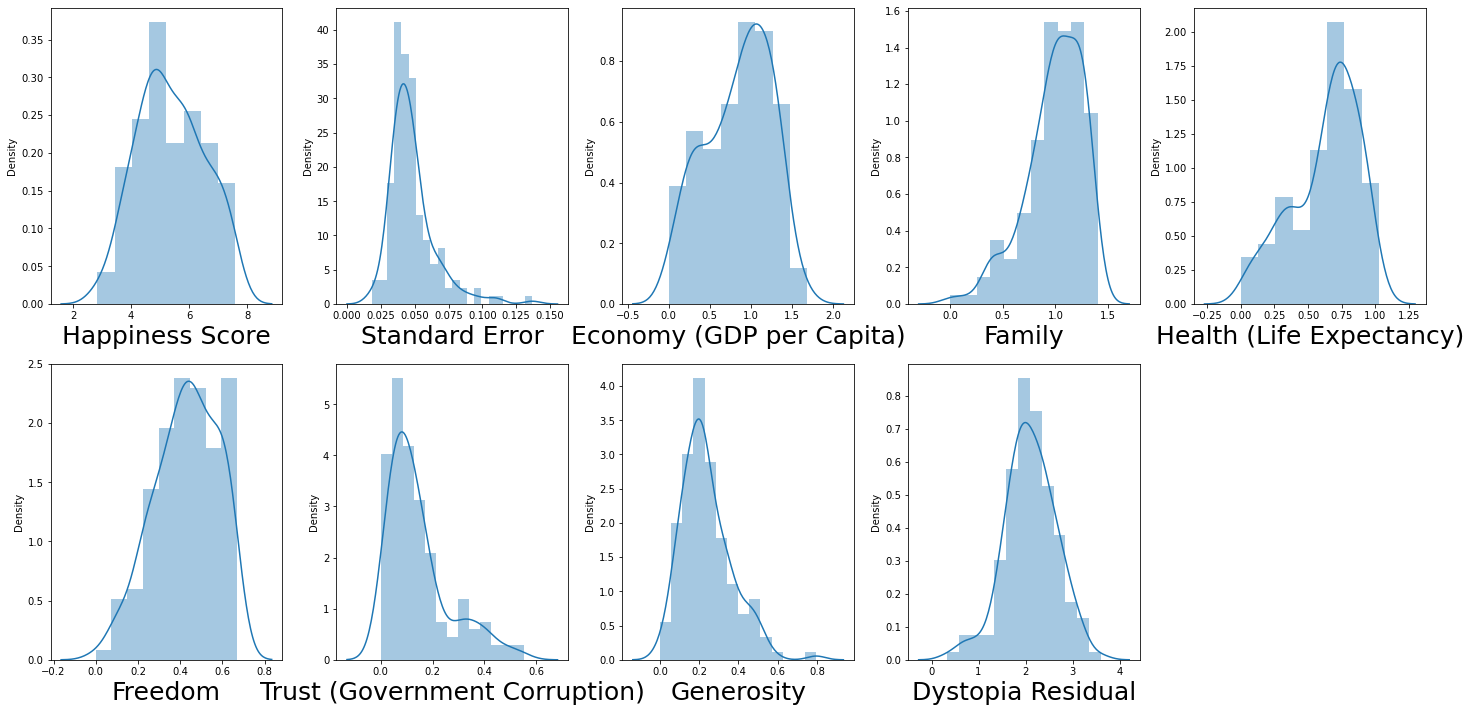

In [147]:
# Let's Visualize the data distribution.
plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 10:
        ax = plt.subplot(2,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()


###### Note:- if our data skewness is between -0.5 and 0.5 then we can consider that our data is distributed symmetric.
###### We can see, Standard Error, Family, ,and Trust(Government Corruption) column are highy skewed,
###### Health column is moderate skewed.
###### Freedom column we can consider as  sysmmetric distribution. 

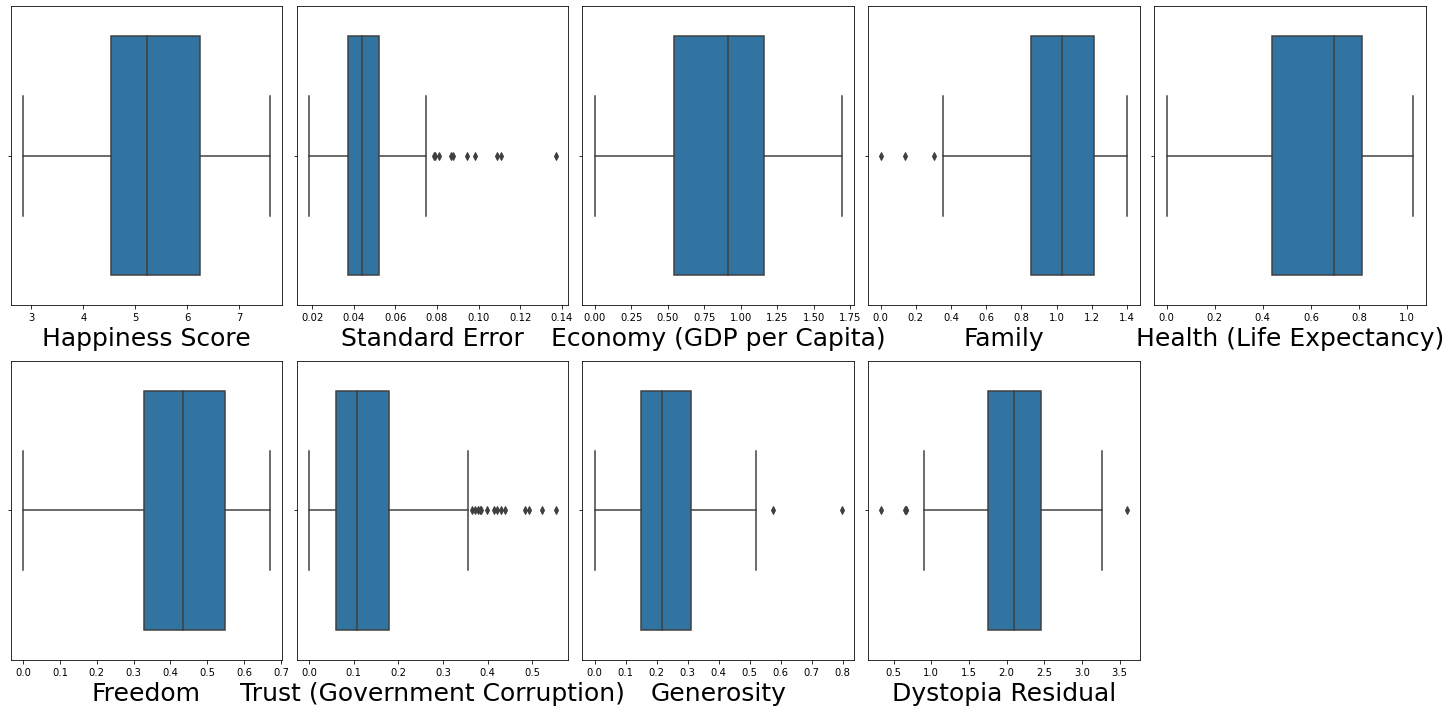

In [148]:
plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 10:
        ax = plt.subplot(2,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

##### From above box plot we can see there are outliers in Standard Error and Trust (Government Corruption) feature whereas very few in Generosity and Dystopia Residual features

### Bivariate Analysis

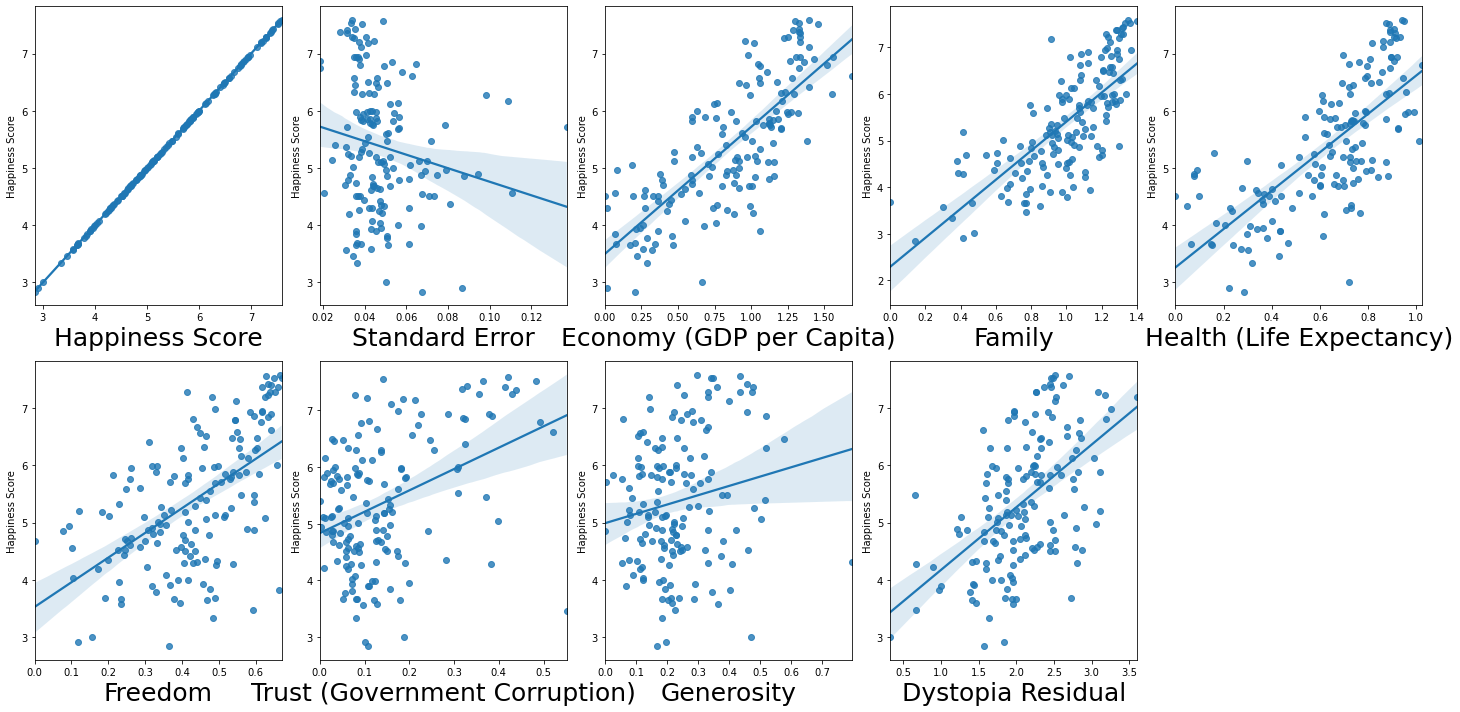

In [149]:
plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 10:
        ax = plt.subplot(2,5,plotnumber)
        sns.regplot(x=df[column],y='Happiness Score',data=df)
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

###### From above Regplot we can see there is correlation between happiness and Economay, Family, And also health, Freedom Trust  but they have oultier.
###### Dystopia also shows linear relationship.

## Multivariate Analysis

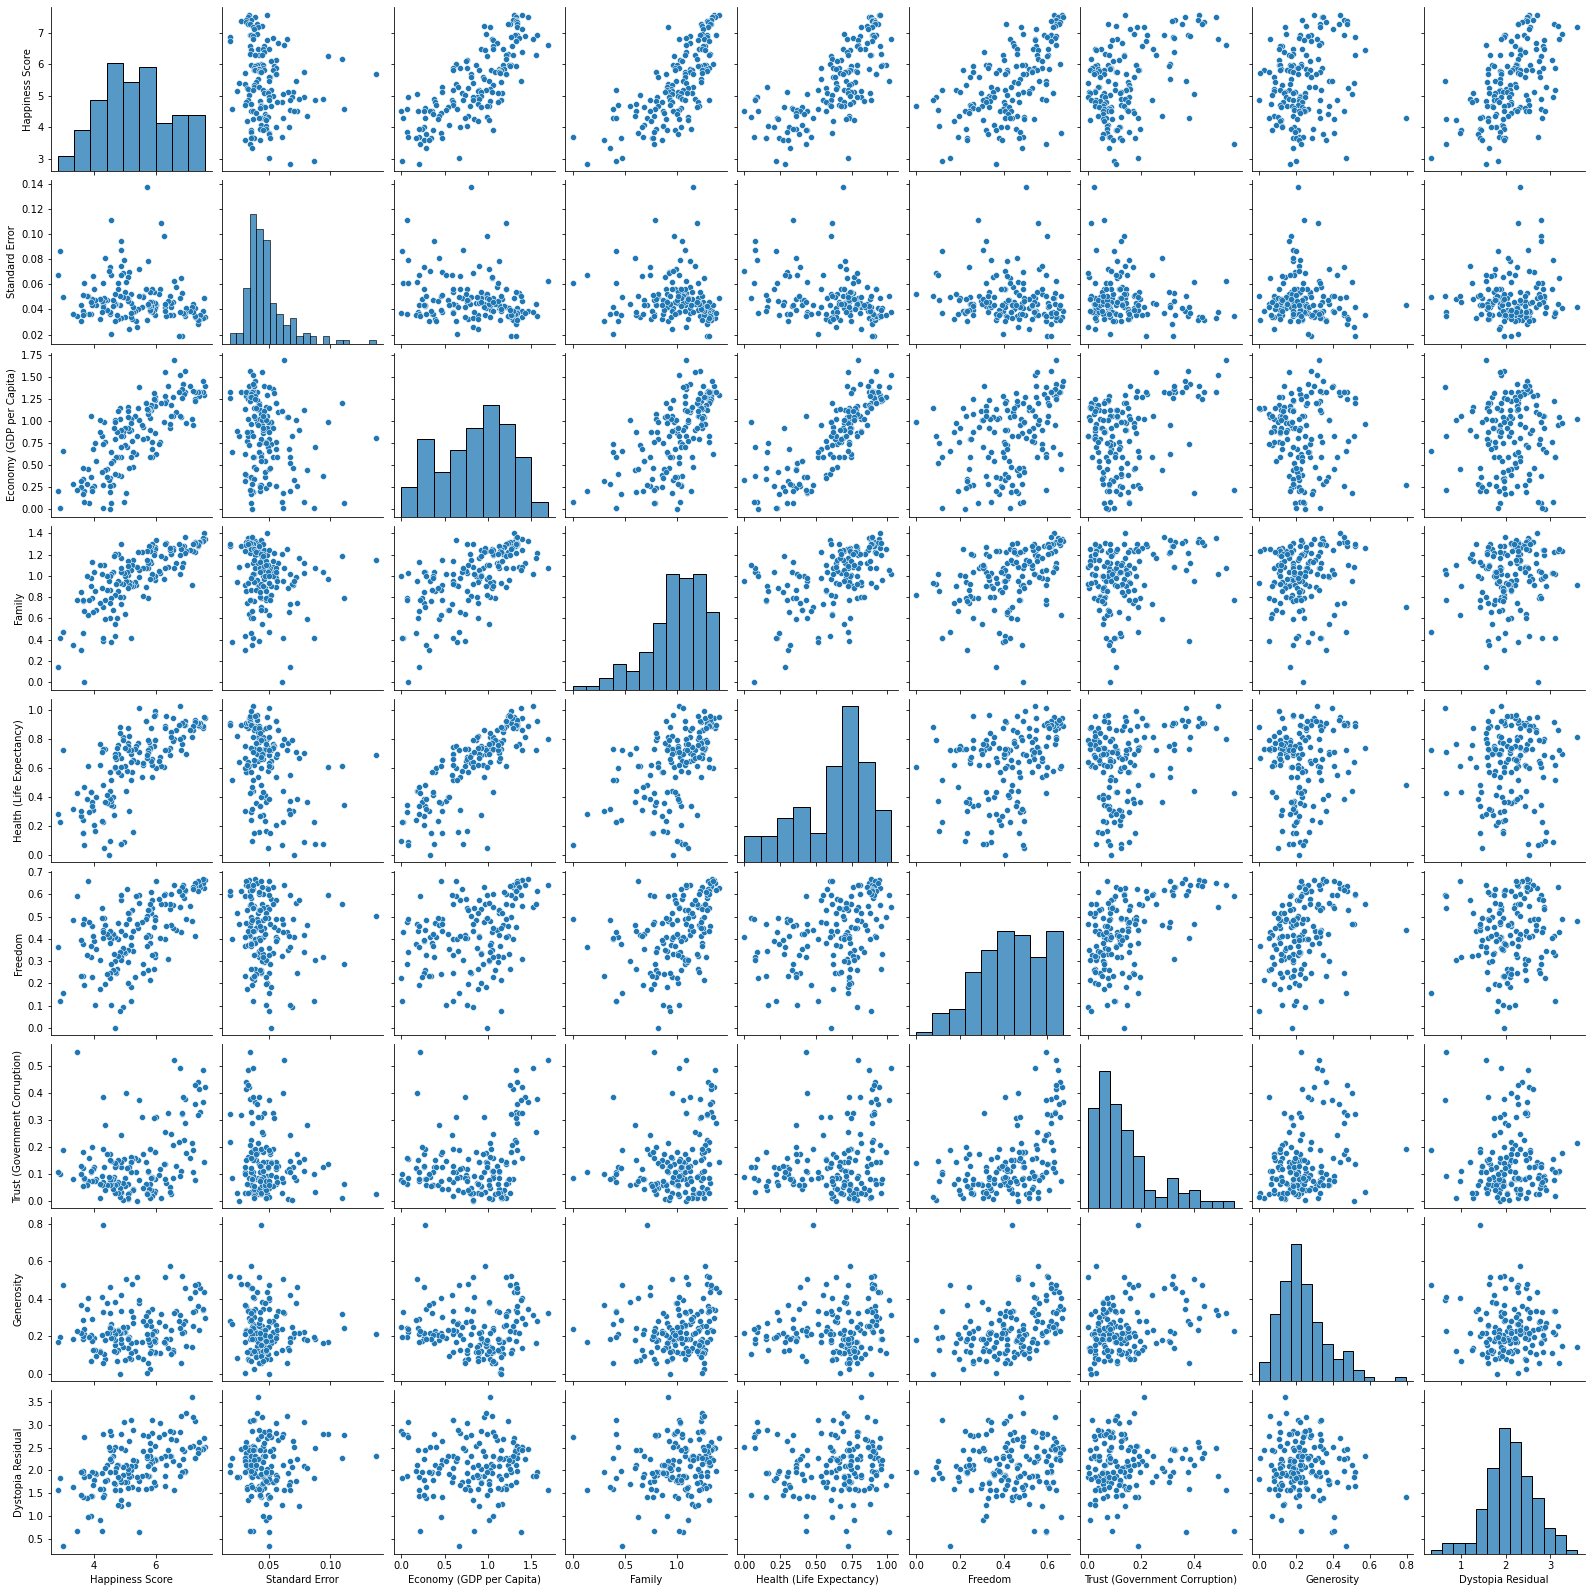

In [150]:
sns.pairplot(df)

###### As we can see our happiness score shows positive linear correlation with almost all features except for a few which show no correlation

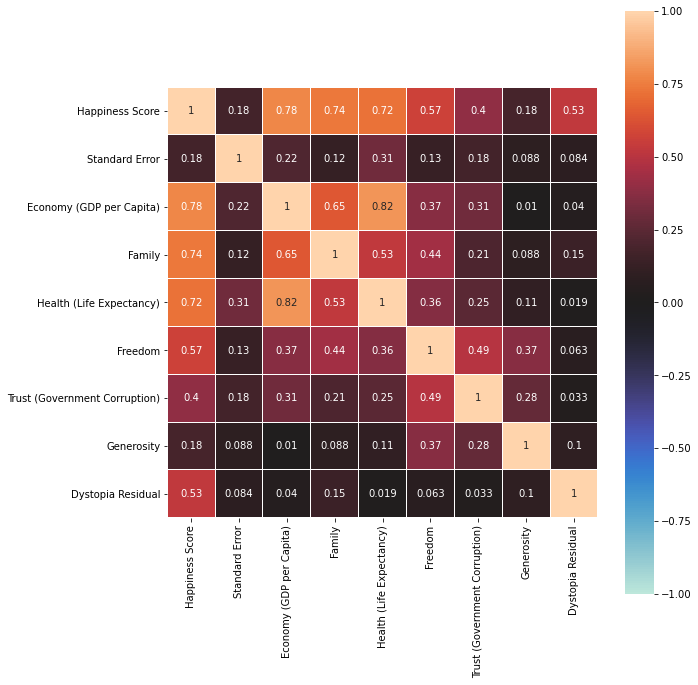

In [152]:
# Let's plot heatmap and check relation between features and label.
df_corr = df.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0, linewidths=0.1)
plt.tight_layout()

###### Our target variable(Happiness Score) shows strong correlation with Economy, Family, Health, Freedom and Dystopia.

## Data cleaning(pre-processing)

In [156]:
# Removeing outlier using zscore.
z_score =np.abs(zscore(df))
df = df[(z_score<3).all(axis=1)]

###### Let's plot boxplot and check for outliers.

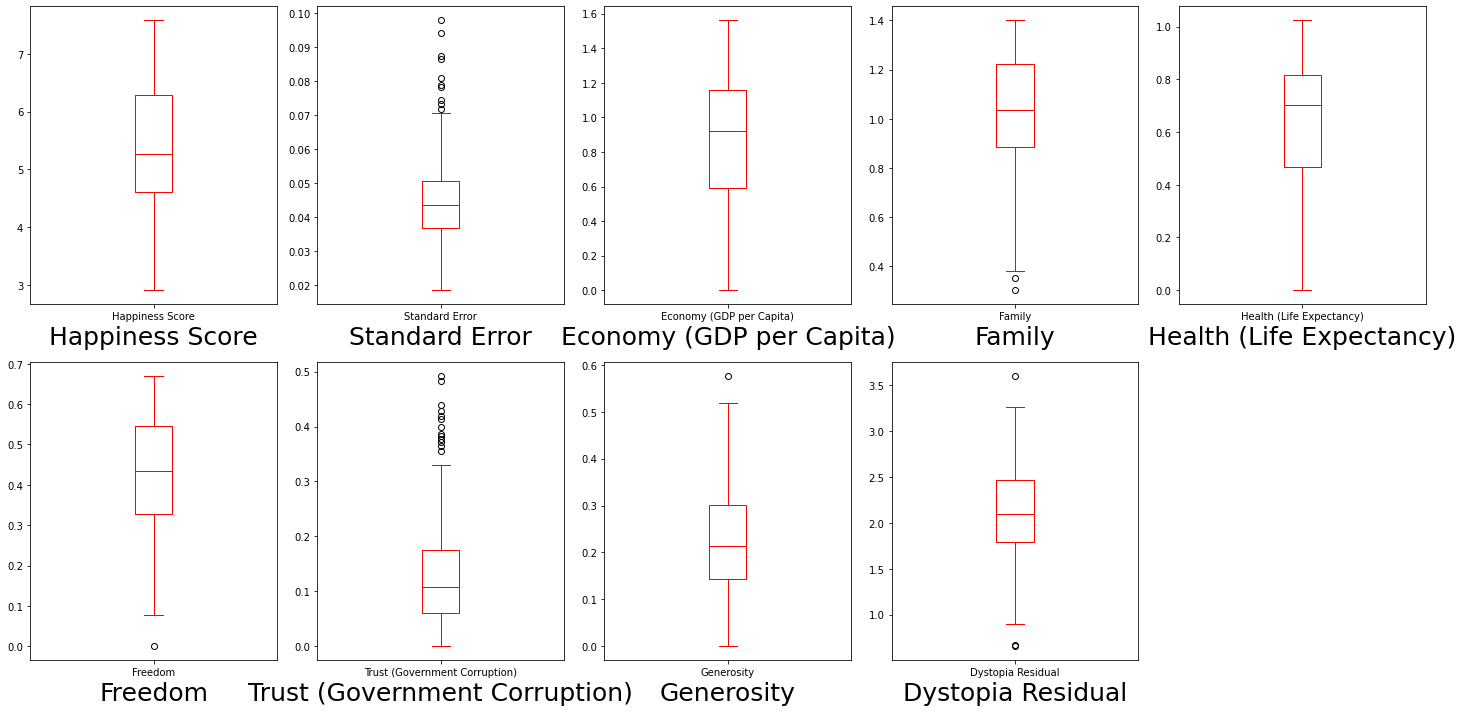

In [158]:
plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 10:
        ax = plt.subplot(2,5,plotnumber)
        df[column].plot(kind='box',color='r')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

###### after removing oultiers, they still present in some columns like Trust and standard Error.

In [159]:
# Checking data shape after z_score
df.shape

(149, 9)

In [160]:
# Let's check data loss after zscore with threshold = 3.
data_loss = (158-149)/158*100
data_loss

5.69620253164557

###### After apply z_score we are loosing 5.6% data which is acceptable. but still we have outliers in our dataset.

In [161]:
# Checking skewness again.
df.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [162]:
# as our data is left skewed perform powertransforming.
from sklearn.preprocessing import PowerTransformer
p =PowerTransformer()
df_p= p.fit_transform(df)
df = pd.DataFrame(df_p,columns=df.columns)

###### Let's check with skewness now.

###### As we can see skewness is removed from all the features




### Sperating features and label from df.

In [164]:
x = df.drop(['Happiness Score'],axis=1)
y = df['Happiness Score']

In [172]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030


###### there is huge difference between Standard error and Dystopia Residual scaling. So let's scale our independant variables.

In [174]:
Mmax =MinMaxScaler()
x_scaled = Mmax.fit_transform(x)

In [177]:
x =pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.380243,0.862295,0.914502,0.858145,0.991316,0.961753,0.669075,0.625344
1,0.621320,0.787868,1.000000,0.868527,0.915949,0.585246,0.856886,0.688668
2,0.363723,0.805963,0.932054,0.754423,0.957838,0.996109,0.735139,0.616669
3,0.467178,0.912891,0.885542,0.770304,1.000000,0.922971,0.742999,0.607522
4,0.407692,0.806598,0.872719,0.801548,0.924420,0.891819,0.881749,0.602886


## Split your data in Train_Test_Split

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(111, 8) (38, 8) (111,) (38,)


# Model Instantiating  And Training data.

## Linear Regression Model

In [185]:
lr = LinearRegression()
lr.fit(x_train,y_train) #Training model with x_train, y_train.

LinearRegression()

In [186]:
y_pred = lr.predict(x_test) # Predicting x_test data using Linear Regression..

## Decision Tree regressor model.

In [189]:
d_tree = DecisionTreeRegressor()
d_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [208]:
y_pred_D = d_tree.predict(x_test)# Predicting x_test using DecisionTreeRegressor.

## K-Neighbours Regressor model

In [210]:
Kn = KNeighborsRegressor()
Kn.fit(x_train,y_train)

KNeighborsRegressor()

In [211]:
y_pred_Kn = Kn.predict(x_test)# Predicting x_test using KNeighborsRegressor.

## Random Forest Regressor model.

In [205]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [206]:
y_pred_Rf = rf.predict(x_test) # Predicting x_test using RandomForestRegressor

#### Let's check R2_Score for all the above models.

In [215]:
print ('R2_score for Linear Regression model:- ',r2_score(y_test,y_pred))
print ('R2_score for Decision Tree Regressor:- ',r2_score(y_test,y_pred_D))
print ('R2_score for K_Neighbors Regressor:- ',r2_score(y_test,y_pred_Kn))
print ('R2_score for Random Forest Regressor:- ',r2_score(y_test,y_pred_Rf))

R2_score for Linear Regression model:-  0.9818977385840612
R2_score for Decision Tree Regressor:-  0.7816411352106766
R2_score for K_Neighbors Regressor:-  0.883394792129246
R2_score for Random Forest Regressor:-  0.9335662230882126


#### The R2_score for Linear regression is more then other models its giving 98%.

##### Let's check Mean Error

In [220]:
print('Mean_squared_error for Linear regression model:- ',mean_squared_error(y_test,y_pred))
print('Mean_squared_error for Decision Tree Regressor:- ',mean_squared_error(y_test,y_pred_D))
print('Mean_squared_error for K_Neighbors Regressor:- ',mean_squared_error(y_test,y_pred_Rf))
print('Mean_squared_error for Random Forest Regressor:- ',mean_squared_error(y_test,y_pred_Kn))

Mean_squared_error for Linear regression model:-  0.022927658472076715
Mean_squared_error for Decision Tree Regressor:-  0.27656530646673
Mean_squared_error for K_Neighbors Regressor:-  0.08414257826939035
Mean_squared_error for Random Forest Regressor:-  0.14768786731652148


#### Here also Linear regression model is giving least mean error 0.022.

In [ ]:
# There for we can say Linear regression model is best model as compare to other models. We can save it.

In [221]:
# Saving the model to the local file system.
filename = "Happiness_Score.pickle"
pickle.dump(lr,open(filename, 'wb'))